In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
df = pd.read_csv("Dataset\\shopping_trends_updated.csv")

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### DATA CLEANING
Check for missing values, duplicates, and inconsistencies.

In [5]:
df.shape

(3900, 18)

In [6]:
# Check for missing values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

### DESCRIPTIVE STATISTICS
Compute summary statistics for numerical and categorical variables.

In [8]:
df.describe(include = "all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


### Univariate analysis for numerical variables


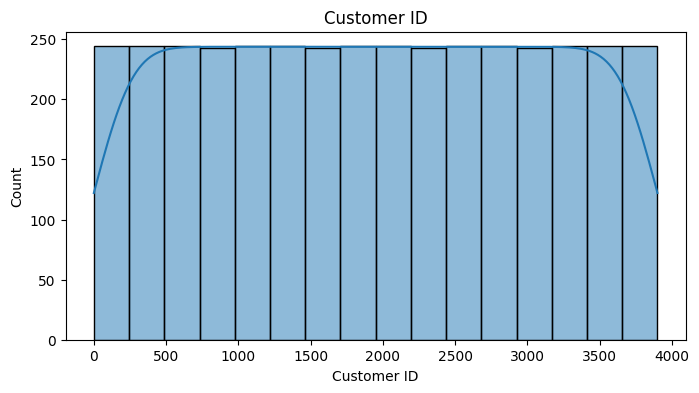

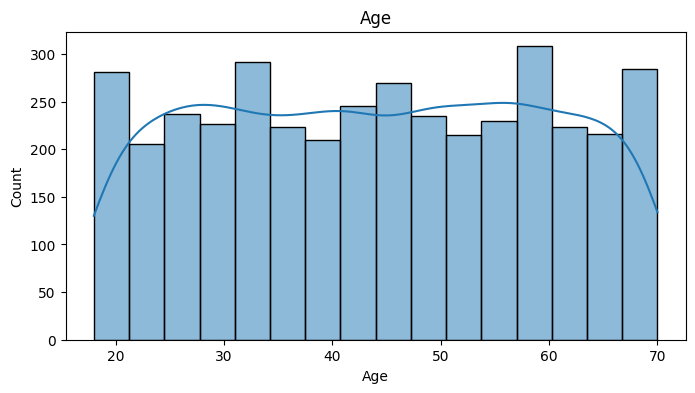

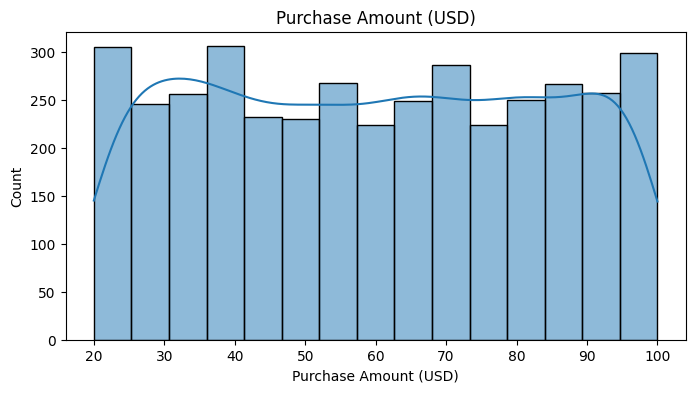

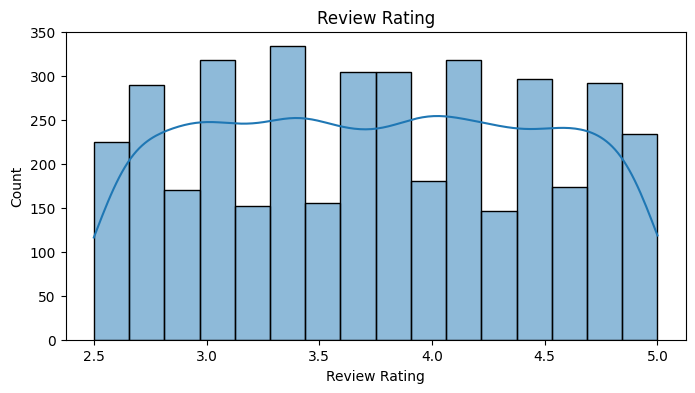

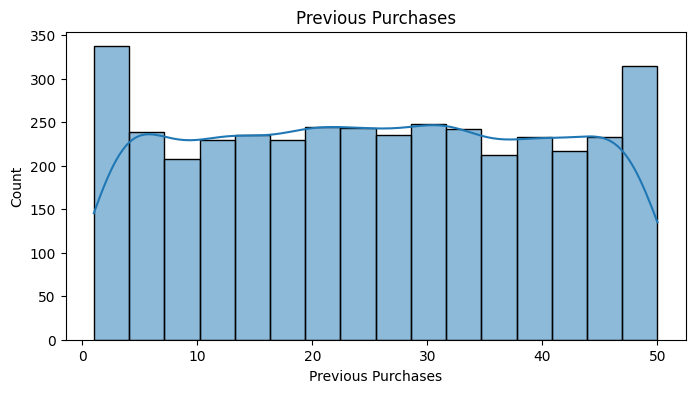

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

### Univariate analysis for categorical variables


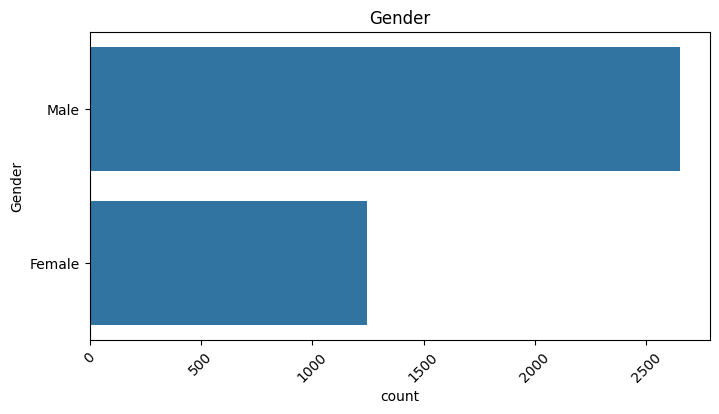

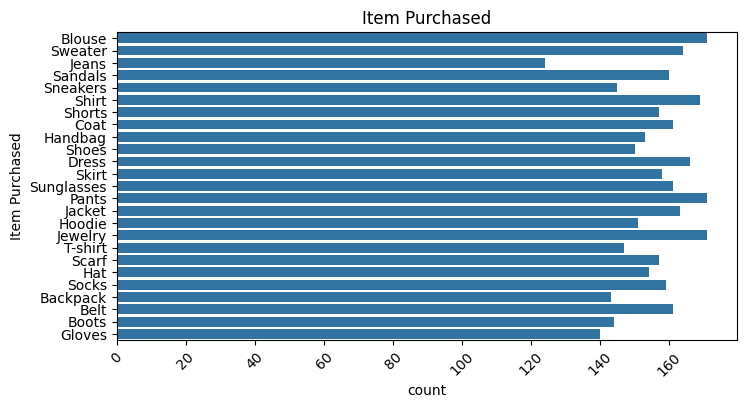

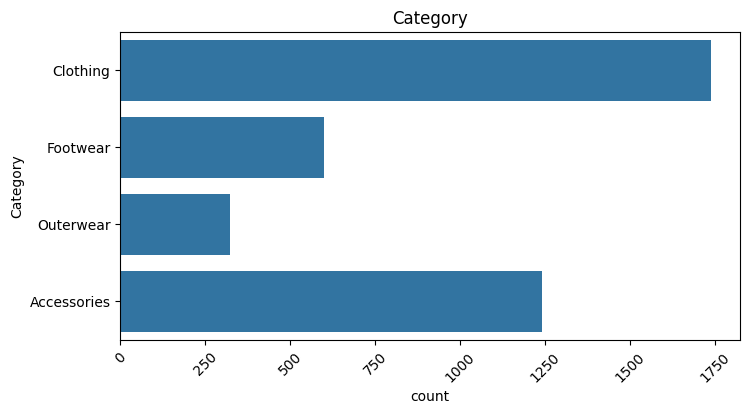

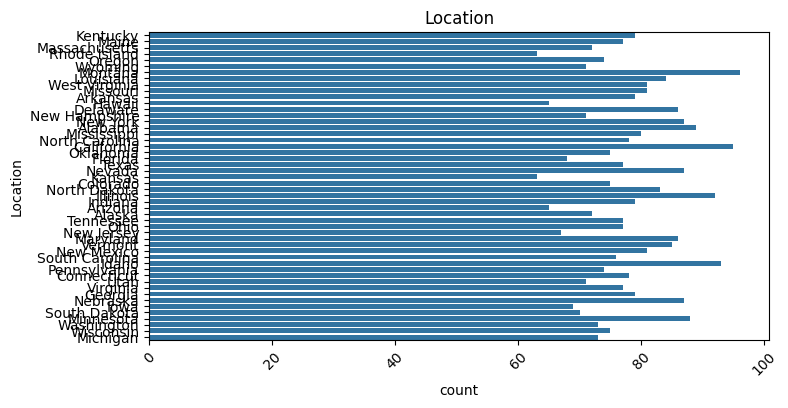

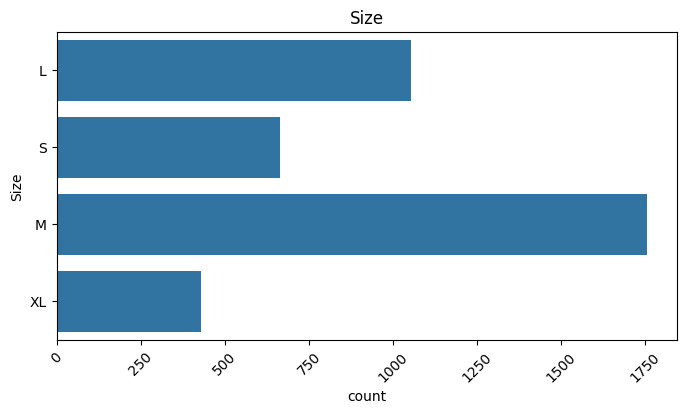

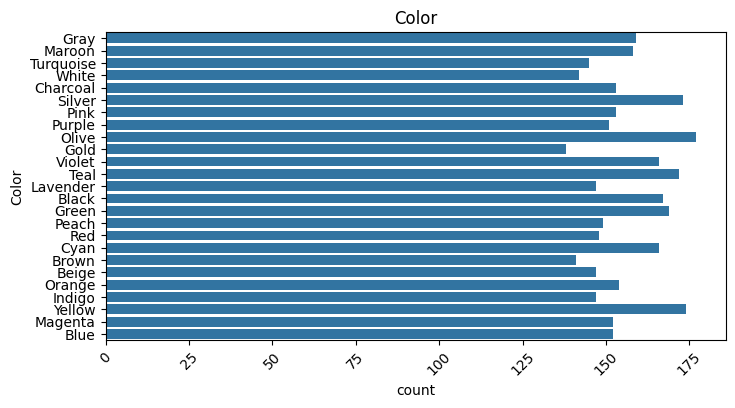

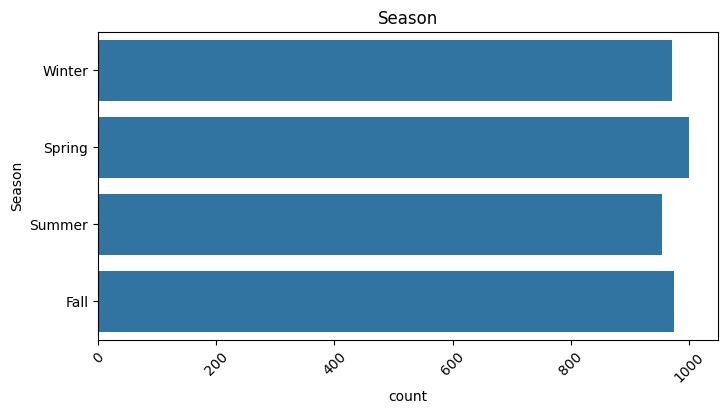

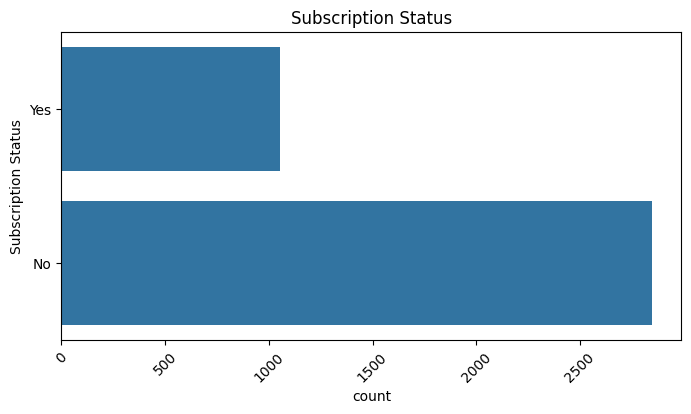

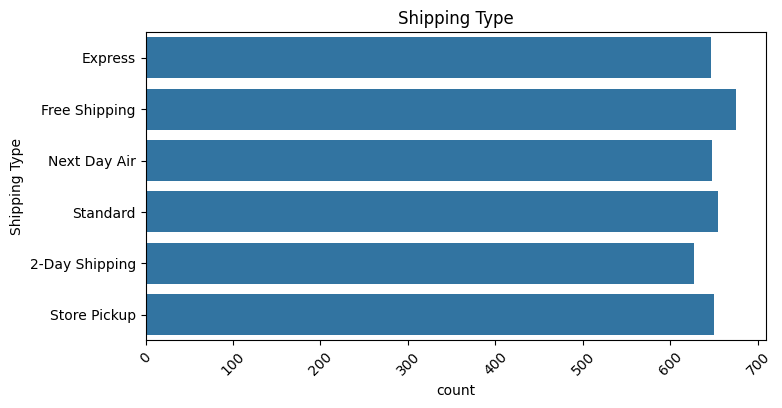

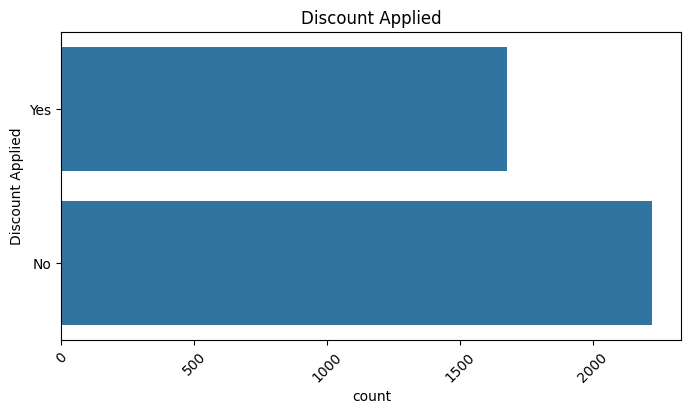

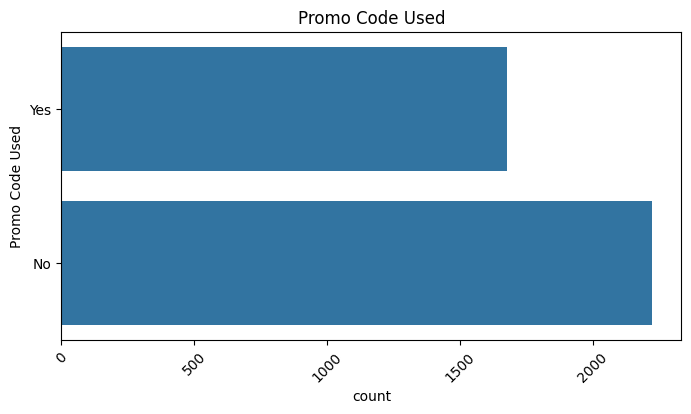

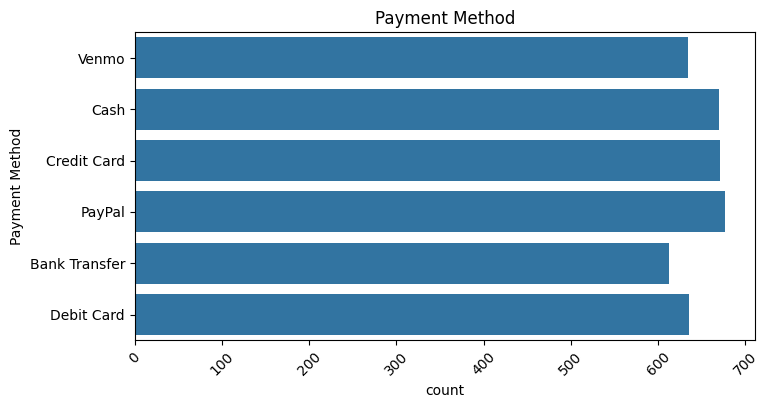

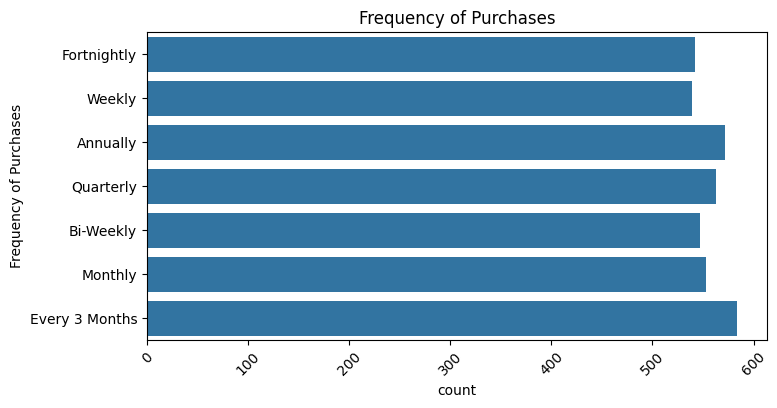

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

By examining these count plots, we can gain an understanding of the distribution of each categorical variable, which is crucial for exploratory data analysis and further modeling tasks. Trends, patterns, and potential imbalances within categorical variables can be identified through visual inspection of these plots.

### Bivariate analysis


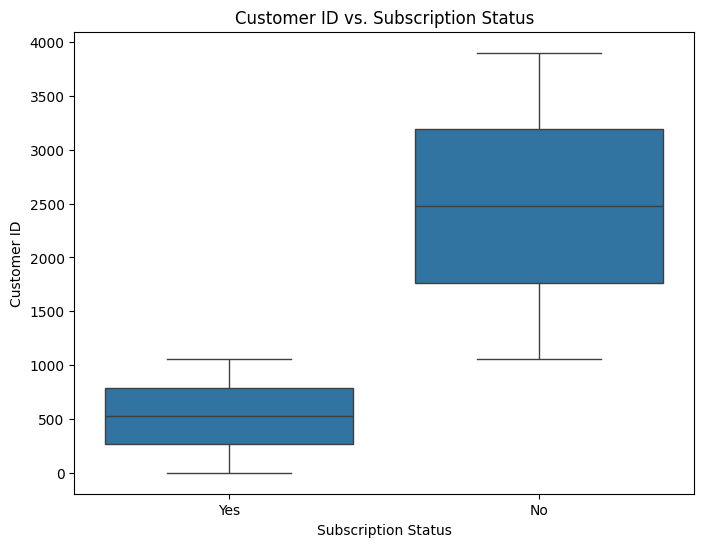

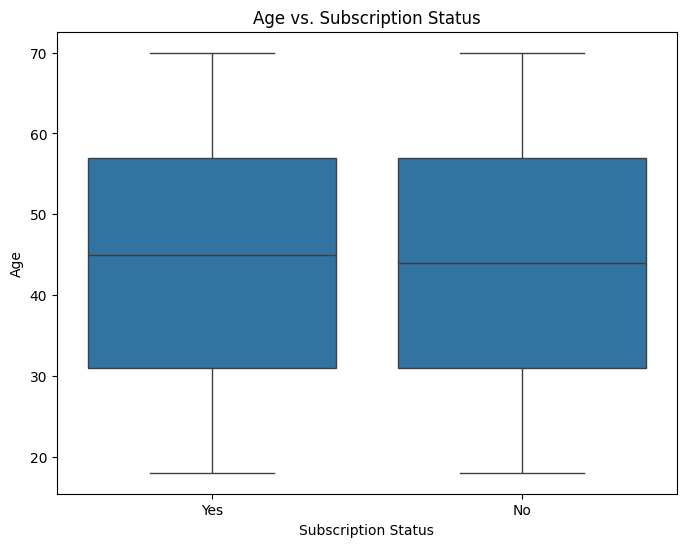

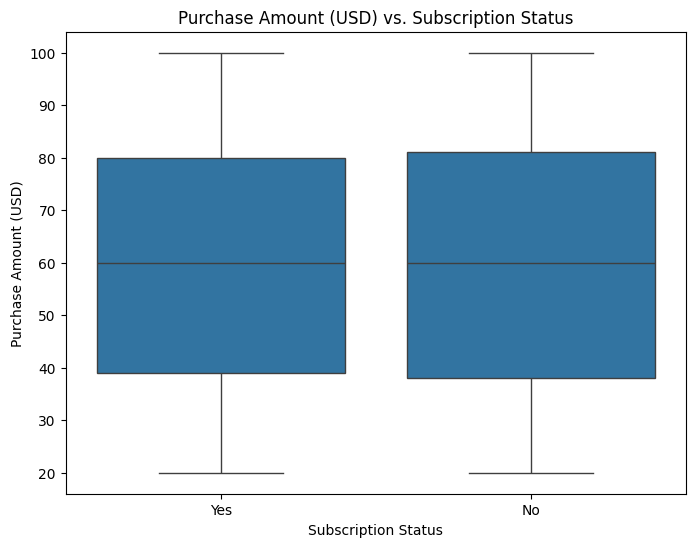

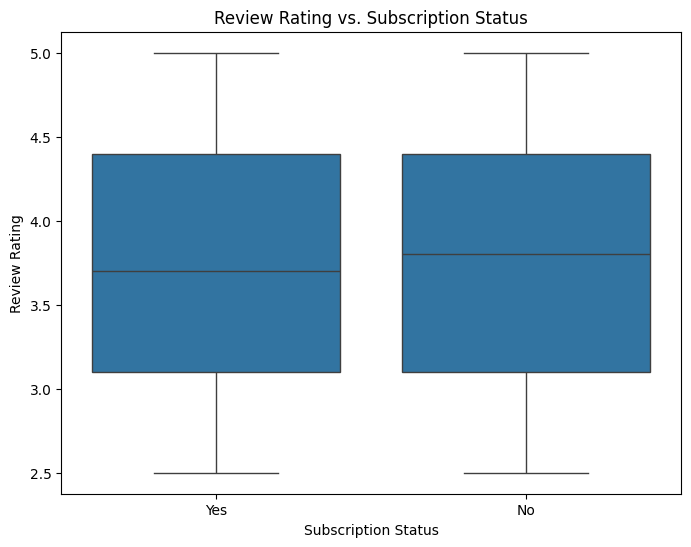

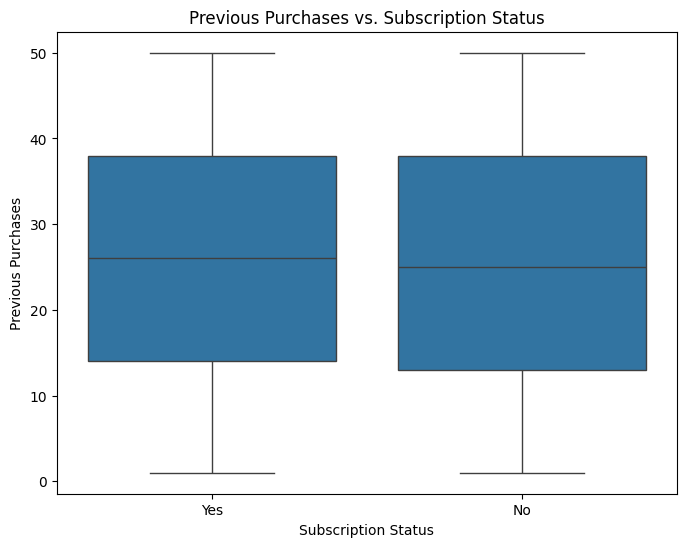

In [11]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Subscription Status', y=col, data=df)
    plt.title(col + ' vs. Subscription Status')
    plt.show()

These box plots enable comparison of the distribution of numerical variables between subscribed and not subscribed customers. By visually inspecting the plots, we can identify differences in the central tendency and spread of each numerical variable across the two subscription status categories.

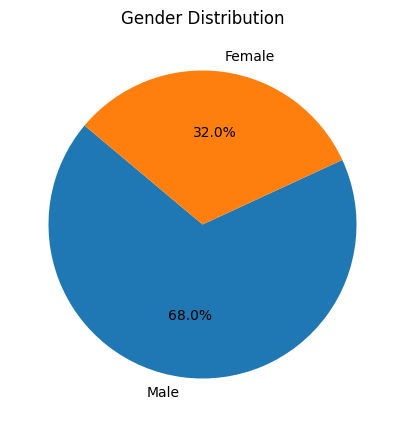

In [15]:
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

### Correlation analysis


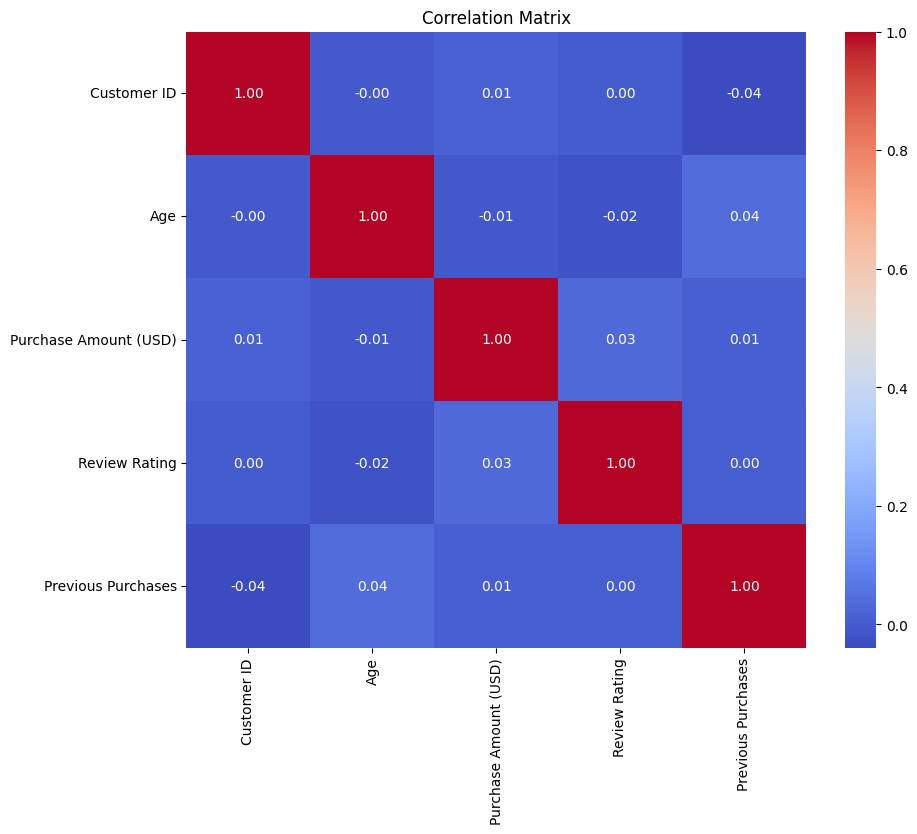

In [16]:
num_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix: The correlation matrix is a square matrix where each cell represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, where:
* 1 indicates a perfect positive correlation,
* -1 indicates a perfect negative correlation,
* 0 indicates no correlation.

Therefore by the heatmap shown above we can conclude that:

- The correlation coefficient between 'Age' and 'Customer ID' is approximately -0.01. This indicates a very weak negative correlation between the age of customers and their unique identification numbers. In practical terms, there is virtually no linear relationship between these two variables.

- The correlation coefficient between 'Purchase Amount' and 'Customer ID' is approximately 0.01. Similarly, this indicates a very weak positive correlation between the purchase amount and the unique identification numbers of customers. Again, in practical terms, there is virtually no linear relationship between these two variables.

- The correlation coefficient between 'Customer ID' and 'Review Rating' is approximately 0.00. This suggests no discernible linear relationship between the unique identification numbers of customers and the review ratings they provide. 

In summary, based on the very small correlation coefficients observed, there is no meaningful linear relationship between 'Customer ID' and other variables such as 'Age', 'Purchase Amount', or 'Review Rating'. 

Similarly Conclusions can be recieved for other variables as well.


### Target variable analysis


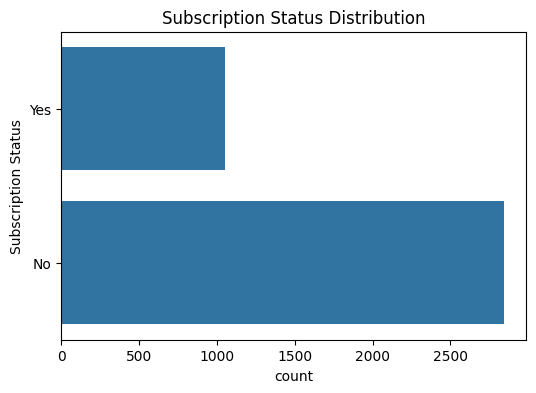

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(df['Subscription Status'])
plt.title('Subscription Status Distribution')
plt.show()

### Outlier detection (using box plots)


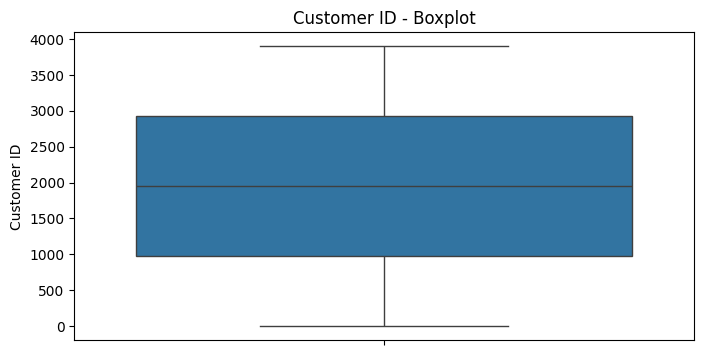

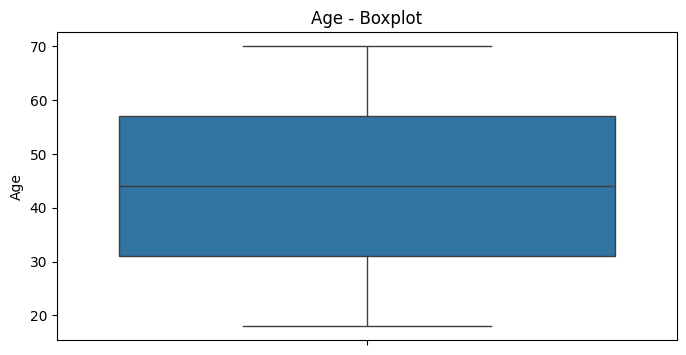

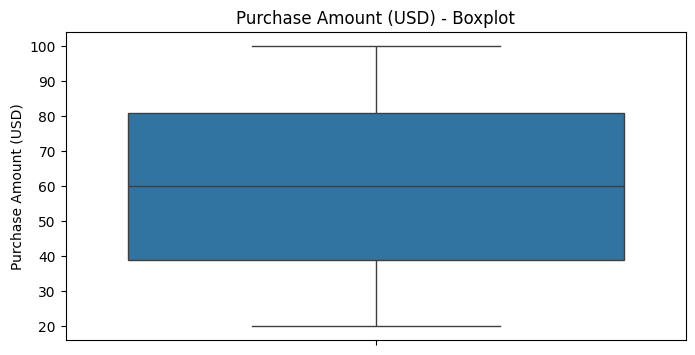

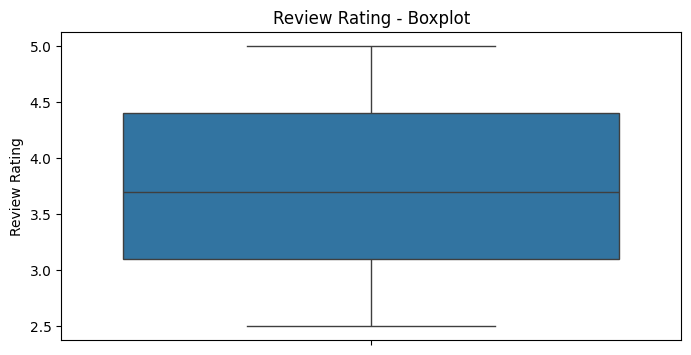

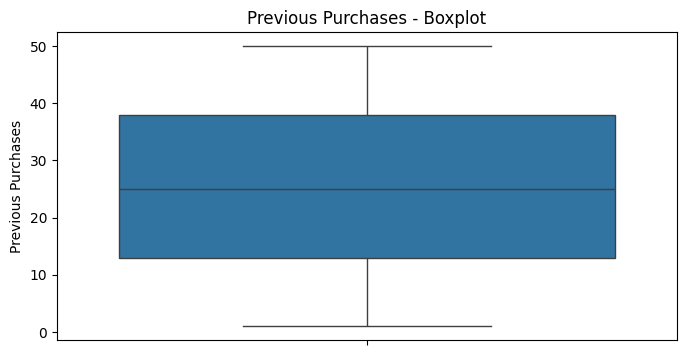

In [18]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(col + ' - Boxplot')
    plt.show()

For each numerical variable in the dataset, the code generated a box plot to visualize the distribution of values and identify potential outliers. You'll see one box plot for each numerical variable in the dataset. If there are outliers, they will be represented as individual points outside the whiskers of the box plot.
As it is visible that there are no points , therefore the dataset has no outliers.

## Training the model 

### Logistic Regression:
* Logistic Regression is a statistical model used for binary classification tasks.
* It models the probability that an instance belongs to a particular class using the logistic function (sigmoid function).
* Despite its name, logistic regression is a linear model and makes predictions by applying a linear combination of feature weights to the input features.
* It's widely used due to its simplicity, interpretability, and efficiency.
* Logistic regression assumes that the relationship between the features and the log-odds of the response variable is linear.
* It's sensitive to outliers and may not perform well if the relationship between features and the target is highly non-linear.

In [19]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

# Selecting features and target variable
X = df.drop(columns=['Gender'])  # Features
y = df['Gender']  # Target variable

# Splitting the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9256410256410257


C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Testing the model 

In [20]:
new_data = pd.read_csv("Dataset\\shopping_trends.csv")
new_data.drop(columns=['Payment Method','Gender'], inplace=True)
new_data.rename(columns={'Preferred Payment Method': 'Payment Method'}, inplace=True)
X = new_data

In [21]:
# Copy the new_data DataFrame to avoid modifying the original data
X_encoded = X.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
categorical_columns = ['Category','Item Purchased', 'Location', 'Size', 'Color', 'Season', 
                       'Subscription Status', 'Shipping Type', 'Discount Applied', 
                       'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
for column in categorical_columns:
    X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

# Now, you can use the trained logistic regression model to make predictions on the new data
predictions = logreg_model.predict(X_encoded)

# Display the predictions
print("Predictions for new data using Logistic Regression:")
print(predictions)

Predictions for new data using Logistic Regression:
[1 1 1 ... 0 0 0]


### Calculate the confusion matrix


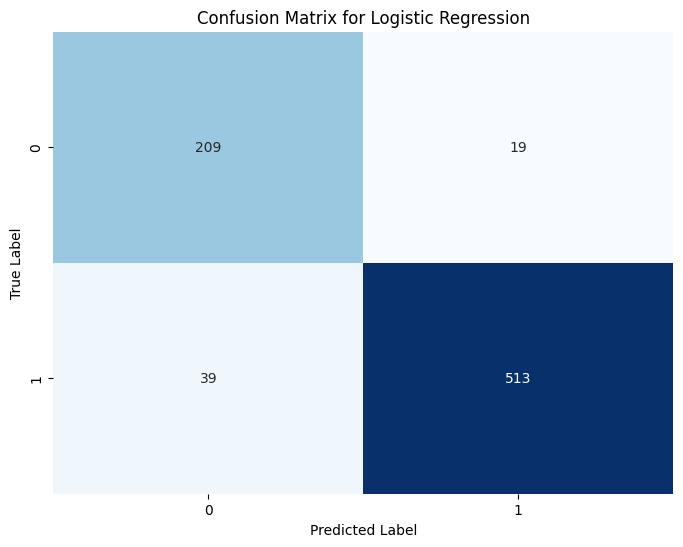

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The heatmap visualization of the confusion matrix allows for a quick and intuitive understanding of the performance of the logistic regression model in terms of correctly and incorrectly classified instances across different classes.

We can see that the logistic regression model has made predictions for each instance in the new data:

* The numerical values represent the model's predicted categories or classes.
* For example, if the target variable 'Subscription Status' is binary with two classes (0 and 1), then the predictions correspond to these classes.
* Each prediction corresponds to a specific instance in the new dataset, indicating the model's belief regarding the subscription status of the instance (subscribed or not subscribed).

### MODEL EVALUATION

#### Classification Report
A textual summary of various classification metrics, including precision, recall, F1-score, and support (number of occurrences of each class).

In [23]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       228
           1       0.96      0.93      0.95       552

    accuracy                           0.93       780
   macro avg       0.90      0.92      0.91       780
weighted avg       0.93      0.93      0.93       780



##### Precision:
* Precision for class 0 (negative class) is 0.84, indicating that out of all instances predicted as class 0, 84% are actually class 0.
* Precision for class 1 (positive class) is 0.96, indicating that out of all instances predicted as class 1, 96% are actually class 1.
Overall, the model has high precision for both classes, with a higher precision for class 1

##### Recall:
* Recall for class 0 is 0.92, indicating that the model correctly identifies 92% of all actual class 0 instances.
* Recall for class 1 is 0.93, indicating that the model correctly identifies 93% of all actual class 1 instances.
* Both classes have high recall values, suggesting that the model effectively captures instances from both classes.
  
##### F1-score:
- The F1-score for class 0 is 0.88, which is the harmonic mean of precision and recall for class 0.
- The F1-score for class 1 is 0.95, which is the harmonic mean of precision and recall for class 1.
- The F1-scores are high for both classes, indicating a balance between precision and recall.

##### Support:
- Support represents the number of occurrences of each class in the test dataset.
Class 0 has a support of 228 instances, while class 1 has a support of 552 instances.

##### Accuracy:
- The overall accuracy of the model is 0.93, indicating that it correctly predicts the class label for 93% of the instances in the test dataset.
Macro Average and Weighted Average:
- The macro average calculates the unweighted mean of precision, recall, and F1-score across all classes.
- The weighted average calculates the weighted mean of precision, recall, and F1-score across all classes, weighted by the number of true instances for each class.
- Both macro and weighted averages provide an overall assessment of the model's performance across all classes.

## K-MEANS CLUSTERING

- K-means is an unsupervised machine learning algorithm for clustering data points into K distinct groups.
- It iteratively assigns data points to the nearest cluster centroid based on Euclidean distance.
- The centroids are updated by calculating the mean of data points assigned to each cluster.
- Iterations continue until centroids converge or a maximum number of iterations is reached.
- K-means is computationally efficient and scalable to large datasets.
- However, it requires specifying the number of clusters in advance and is sensitive to initial centroid selection.
- It's widely used for tasks like customer segmentation, image compression, and anomaly detection.

### NORMALIZATION

In [28]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical features
normalized_data = scaler.fit_transform(numeric_features)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_features.columns)

In [29]:
num_clusters = 3

# Fitting K-means to the normalized data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_df)

# Adding cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Generate predicted labels
predicted_labels = kmeans.labels_

# Displaying the number of data points in each cluster
print("Number of data points in each cluster:")
print(df['Cluster'].value_counts())

# You can also explore the cluster centroids
print("\nCluster centroids:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=numeric_features.columns))

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\himan\AppData\Local\Programs\Python\P

Number of data points in each cluster:
Cluster
1    1365
2    1353
0    1182
Name: count, dtype: int64

Cluster centroids:
   Customer ID       Age  Purchase Amount (USD)  Review Rating  \
0     0.009050  0.110545               0.827752       0.137642   
1    -0.183724  0.265389              -0.950982      -0.235231   
2     0.177857 -0.364897               0.238474       0.117608   

   Previous Purchases  
0            0.793842  
1            0.289185  
2           -0.985831  


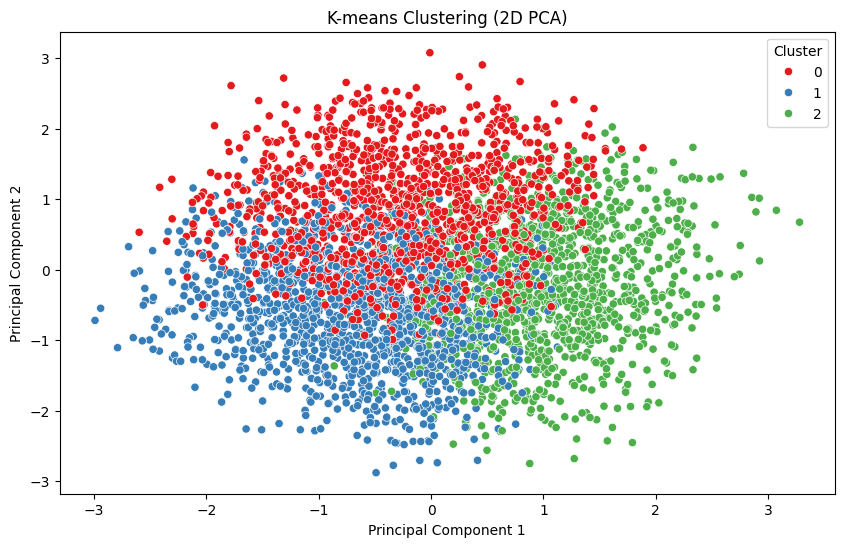

In [30]:
# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_df)

# Add cluster labels to the reduced data
reduced_data_with_clusters = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data_with_clusters['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=reduced_data_with_clusters, palette='Set1', legend='full')
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The output of this code is a 2D scatter plot visualizing the results of K-means clustering in a reduced-dimensional space obtained through Principal Component Analysis (PCA). In this plot:

* Each point represents a data point in the reduced-dimensional space, with its coordinates determined by the principal components (PC1 and PC2).
* The color of each point corresponds to the cluster it belongs to, as determined by the K-means clustering algorithm.
* Different clusters are visually distinguished by different colors.
* The title of the plot indicates that it represents "K-means Clustering (2D PCA)".
* Axes labels indicate the principal components (PC1 and PC2).


### MODEL EVALUATION

#### Silhouette Score
Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better cluster separation.

In [31]:
silhouette_avg = silhouette_score(normalized_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.13826068332759442


#### Davies-Bouldin Index
Computes the average similarity between each cluster and its most similar cluster, where a lower index represents better separation.

db_index = davies_bouldin_score(normalized_df, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

#### Calinski-Harabasz Index
Ratio of the between-cluster dispersion to the within-cluster dispersion. Higher values indicate better-defined clusters.

In [34]:
ch_index = calinski_harabasz_score(normalized_df, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 634.7358413816027


#### Elbow Method
Plotting the within-cluster sum of squares (inertia) for different values of K and looking for an "elbow" point where adding more clusters doesn't improve the model significantly.

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

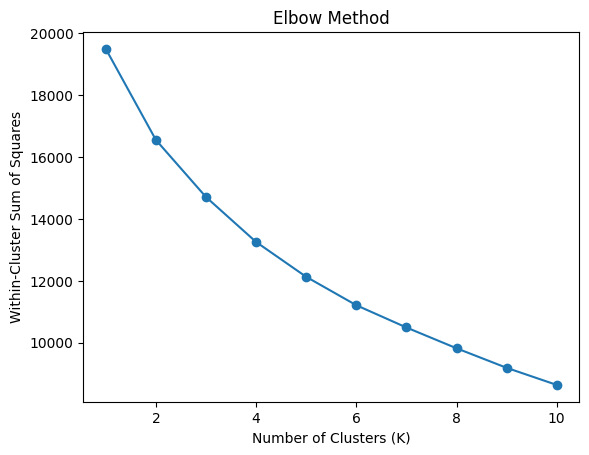

In [36]:
inertia_values = []
k_range = range(1, 11)  # Try different values of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

### Gradient Boosting Machine (GBM):
* GBM is a powerful ensemble learning technique used for both regression and classification tasks.
* It builds multiple decision trees sequentially, where each tree corrects the errors of the previous one.
* At each iteration, the algorithm fits a new tree to the residuals (or gradients) of the previous predictions, hence the name "gradient boosting".
* The final prediction is made by aggregating the predictions of all trees.
* GBM is known for its high predictive accuracy and robustness to outliers.

However, it can be computationally expensive and sensitive to overfitting, especially with deep trees and large datasets.

#### Normalizing the data
to ensure that features are on a similar scale

In [40]:
# Copy the original dataframe for normalization
normalized_df = df.copy()

# Exclude non-numeric columns for normalization
numeric_columns = normalized_df.select_dtypes(include=[np.number]).columns

# Apply Min-Max normalization to numeric columns
scaler = MinMaxScaler()
normalized_df[numeric_columns] = scaler.fit_transform(normalized_df[numeric_columns])

# Define features (X) and target variable (y)
X = normalized_df.drop(columns=['Category'])  # Exclude the target variable
y = normalized_df['Category']

In [41]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

# Selecting features and target variable
X = df.drop(columns=['Category'])  # Features
y = df['Category']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = gbm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("GBM Accuracy:", accuracy)

GBM Accuracy: 1.0


An accuracy score of 1.0 (or 100%) suggests that the Gradient Boosting Machine (GBM) model achieved perfect accuracy on the test set. This means that the model made correct predictions for all instances in the test data.

In [42]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.0


This means that the model's predictions exactly match the true values of the target variable in the test data.

#### Testing the Model

In [45]:
new_data = pd.read_csv("Dataset\\shopping_trends.csv")
new_data.drop(columns=['Payment Method'], inplace=True)
new_data.rename(columns={'Preferred Payment Method': 'Payment Method'}, inplace=True)
new_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [47]:
# Assign 'Category' as the target variable
y_test = new_data['Category']

# Drop 'Category' from features
X = new_data.drop(columns=['Category'])

expected_order = ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Purchase Amount (USD)', 'Location', 
                  'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 
                  'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']

# Reorder the columns in X DataFrame
X = X[expected_order]

X_encoded = X.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
categorical_columns = ['Gender', 'Item Purchased', 'Location', 'Size', 'Color', 'Season', 
                       'Subscription Status', 'Shipping Type', 'Discount Applied', 
                       'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
for column in categorical_columns:
    X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

# Display the DataFrame
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[1 1 1 ... 0 0 0]


In [48]:
# Inverse transform the numerical predictions to original categorical labels
decoded_predictions = label_encoder.inverse_transform(predictions)

# Display the decoded predictions
print("Decoded Predictions for new data:")
predictions_df = pd.DataFrame({'Predictions': decoded_predictions})

# Display the DataFrame
print(predictions_df.head())

Decoded Predictions for new data:
  Predictions
0   Bi-Weekly
1   Bi-Weekly
2   Bi-Weekly
3   Bi-Weekly
4   Bi-Weekly


We can infer that the GBM model has made predictions for each instance in the new data

* The numerical values represent the model's predicted categories or classes.
* For example, if the target variable is a categorical variable with three classes (0, 1, and 2), then the predictions correspond to these classes.
* Each prediction corresponds to a specific instance in the new dataset, indicating which category the model believes the instance belongs to.